# Supervised Learning with scikit-learn
Run the hidden code cell below to import the data used in this course.

In [16]:
# Importing pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Importing the course datasets 
diabetes = pd.read_csv('datasets/diabetes_clean.csv')
music = pd.read_csv('datasets/music_clean.csv')
advertising = pd.read_csv('datasets/advertising_and_sales_clean.csv')
telecom = pd.read_csv("datasets/telecom_churn_clean.csv")

## Take Notes

Add notes about the concepts you've learned and code cells with code you want to keep.

# 1. what is machine Learning ?

Machine learning is the process whereby computers learn to make decisions from data without being explicitly programmed.

For example, learning to predict whether an email is spam or not spam given its content and sender. Or learning to cluster books into different categories based on the words they contain, then assigning any new book to one of the existing clusters.

## Unsuppervised Learning

Unsupervised learning is the process of uncovering hidden patterns and structures from unlabeled data. For example, a business may wish to group its customers into distinct categories based on their purchasing behavior without knowing in advance what these categories are. This is known as clustering, one branch of unsupervised learning.

## Supervised Learning

Supervised learning is a type of machine learning where the values to be predicted are already known, and a model is built with the aim of accurately predicting values of previously unseen data. Supervised learning uses features to predict the value of a target variable, such as predicting a basketball player's position based on their points per game.

- ## Types of Supervised Learning : 
  There are **two types** of **supervised learning**. **Classification** is used to predict the label, or category, of an observation. For example, we can predict whether a bank transaction is fraudulent or not. As there are two outcomes here - a fraudulent transaction, or non-fraudulent transaction, this is known as **binary classification**. **Regression** is used to predict **continuous values**. For example, a model can use features such as number of bedrooms, and the size of a property, to predict the target variable, price of the property.

- ## Naming convension :
   we call a feature throughout the course, others may call a predictor variable or independent variable. Also, what we call the target variable, others may call dependent variable or response variable.


- ## Requirements to satisfy before performing supervised learning :
     - Our data must not have missing values
     - must be in numeric format
     - stored as pandas DataFrames or Series, or NumPy arrays
     
  This requires some exploratory data analysis first to ensure data is in the correct format. Various pandas methods for descriptive statistics, along with appropriate data visualizations, are useful in this step.

## scikit-learn syntax
scikit-learn follows the same syntax for all supervised learning models, which makes the workflow repeatable. Let's familiarize ourselves with the general scikit-learn workflow syntax, before we explore using real data later in the chapter. We import a Model, which is a type of algorithm for our supervised learning problem, from an sklearn module. For example, the k-Nearest Neighbors model uses distance between observations to predict labels or values. We create a variable named model, and instantiate the Model. A model is fit to the data, where it learns patterns about the features and the target variable. We fit the model to X, an array of our features, and y, an array of our target variable values. We then use the model's dot-predict method, passing six new observations, X_new. For example, if feeding features from six emails to a spam classification model, an array of six values is returned. A one indicates the model predicts that email is spam, and a zero represents a prediction of not spam.

`from sklearn.module import Model`

`model = Model()`

`model.fit(X,y)`

`prediction = model.predict(X_new)`

we learned that supervised learning uses labels. Let's discuss how we can build a classification model, or classifier, to predict the labels of unseen data.

There are four steps. First, we build a classifier, which learns from the labeled data we pass to it. We then pass it unlabeled data as input, and have it predict labels for this unseen data. As the classifier learns from the labeled data, we call this the training data.

## K - Nearest Neighbors : Fit

In [87]:
print(telecom.head())

   Unnamed: 0  account_length  ...  customer_service_calls  churn
0           0             128  ...                       1      0
1           1             107  ...                       1      0
2           2             137  ...                       0      0
3           3              84  ...                       2      0
4           4              75  ...                       3      0

[5 rows x 20 columns]


In [88]:
y = telecom["churn"].values
X = telecom[["account_length", "customer_service_calls"]].values


knn = KNeighborsClassifier(n_neighbors = 6)


knn.fit(X, y)

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])


y_pred = knn.predict(X_new)


print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


##  Measuring model performance

In classification, accuracy is a commonly-used metric. Accuracy is the number of correct predictions divided by the total number of observations.

## Model complexity

Let's discuss how to interpret k. Recall that we discussed decision boundaries, which are thresholds for determining what label a model assigns to an observation. In the image shown, as k increases, the decision boundary is less affected by individual observations, reflecting a simpler model. Simpler models are less able to detect relationships in the dataset, which is known as underfitting. In contrast, complex models can be sensitive to noise in the training data, rather than reflecting general trends. This is known as overfitting.

## interpret k using a model complexity curve



- Train/test split + computing accuracy

In [89]:
X = telecom.drop("churn", axis=1).values
y = telecom["churn"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify= y)
knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train, y_train)


print(knn.score(X_test, y_test))

0.8545727136431784


- Overfitting and underfitting

In [90]:

neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  

	knn = KNeighborsClassifier(n_neighbors= neighbor)
  
	
	knn.fit(X_train, y_train)
  
	
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


- Visualizing model complexity

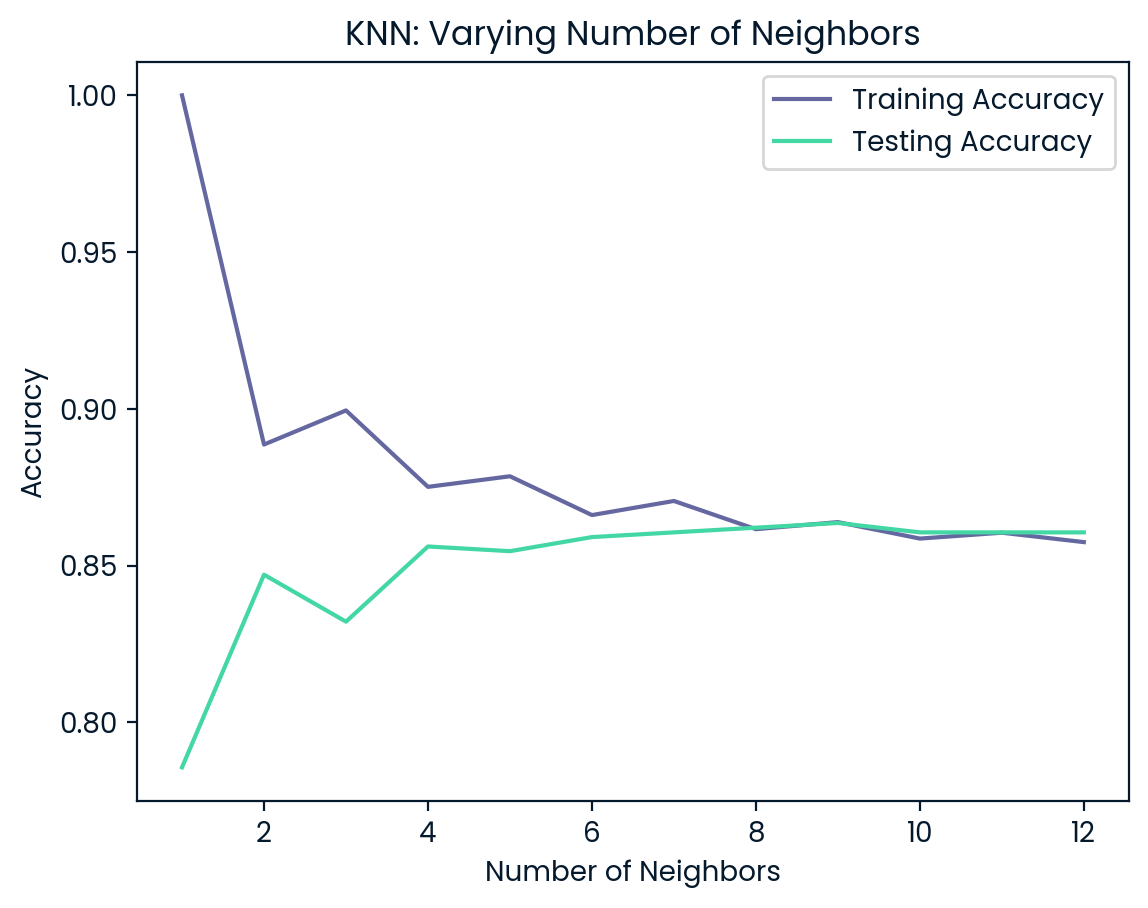

In [91]:
plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.show()

# 2. supervised learning: regression

- Creating Features

In [92]:
X = advertising['radio'].values
y = advertising['sales'].values
X = X.reshape(-1, 1)
print(X.shape, y.shape)

(4546, 1) (4546,)


- Building a linear regression model

In [93]:
reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)
print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


- Visualizing a linear regression model

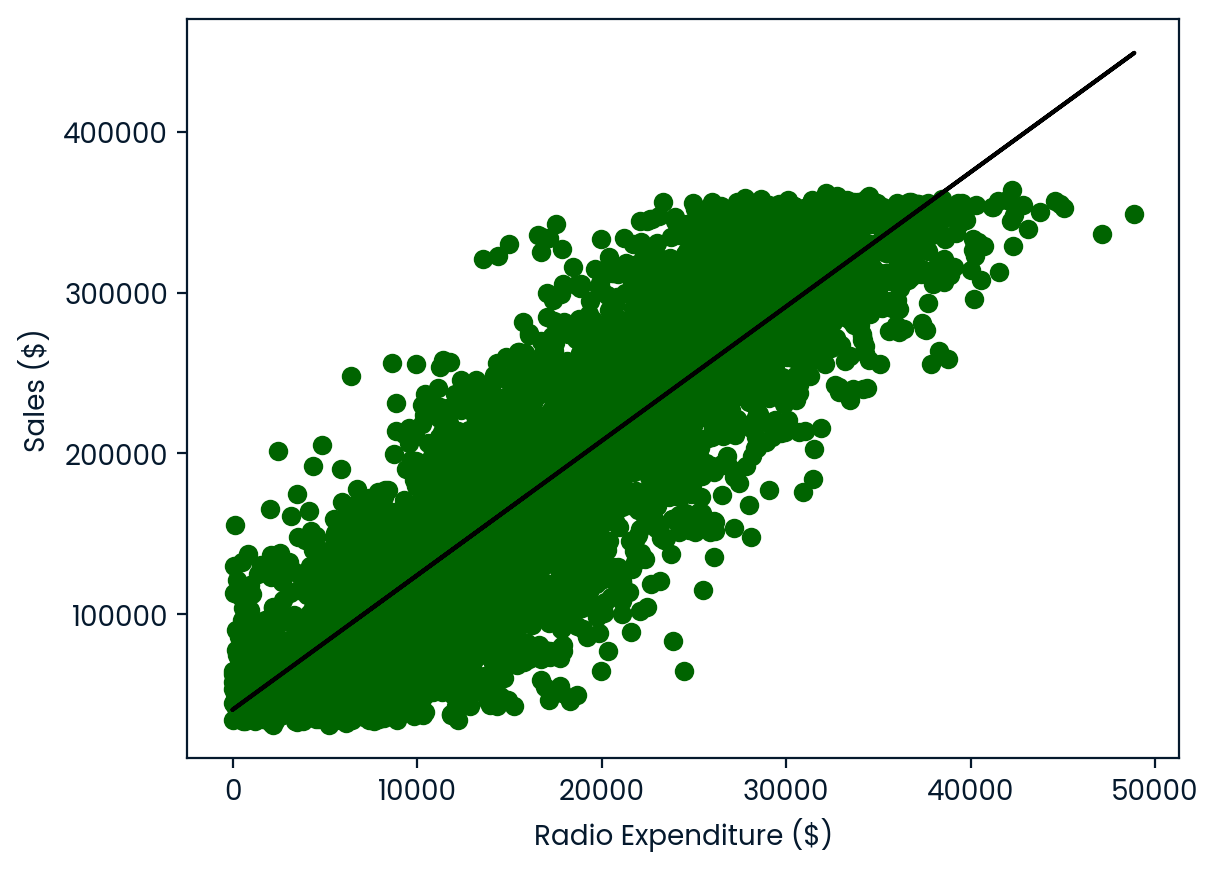

In [94]:
plt.scatter(X, y, color="darkgreen")
plt.plot(X, predictions, color="black")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")
plt.show()

- R-squared

  The default metric for linear regression is R-squared, which quantifies the amount of variance in the target variable that is explained by the features. Values can range from zero to one, with one meaning the features completely explain the target's variance.
  
  To compute R-squared, we call the model's dot-score method, passing the test features and targets. 

- Mean Squared Rrror and Root Mean Squared Error
  
  Another way to assess a regression model's performance is to take the mean of the residual sum of squares. This is known as the mean squared error, or MSE. MSE is measured in units of our target variable, squared. For example, if a model is predicting a dollar value, MSE will be in dollars squared. To convert to dollars, we can take the square root, known as the root mean squared error, or RMSE.

## Fit and predict for regression(Using all features of telecom data)

In [95]:
print(advertising.head())

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18


In [96]:
print(advertising.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB
None


In [97]:
X = advertising.drop(["sales", "influencer"], axis=1).values
y = advertising["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


## Regression Performance

In [98]:
r_squared = reg.score(X_test, y_test)

rmse = mean_squared_error(y_test, y_pred, squared= False)

print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


## Cross-Validation

pitfall of `train_test_split` and why to move `Cross-Validation`?

If we're computing `R-squared` on our test set, the `R-squared` returned is dependent on the way that we split up the data! The data points in the test set may have some peculiarities that mean the R-squared computed on it is not representative of the model's ability to generalize to unseen data. To combat this dependence on what is essentially a random split, we use a technique called cross-validation.

## Cross-validation for R-squared

In [99]:
X = advertising.drop(["sales", "influencer"], axis=1).values
y = advertising["sales"].values
kf = KFold(n_splits= 6, shuffle= True, random_state= 5)
reg = LinearRegression()
cv_scores = cross_val_score(reg, X, y, cv= kf) # `cross_val_score` score = R^2
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


## Analyzing cross-validation metrics

In [100]:
print(np.mean(cv_scores))
print(np.std(cv_scores))
# Display the 95% confidence interval for your results using np.quantile()
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


## Regularized Regression

regularization in regression, a technique used to avoid overfitting.fitting a linear regression model minimizes a loss function to choose a coefficient, a, for each feature, and the intercept, b. If we allow these coefficients to be very large, we can get overfitting. Therefore, it is common practice to alter the loss function so that it penalizes large coefficients. This is called regularization.

There are two type of Regularized Regression - 1.Ridge Regression 2. Lasso Regression

- **Ridge Regression(Regularized regression: Ridge)** :- we use the Ordinary Least Squares loss function plus the squared value of each coefficient, multiplied by a constant, alpha. So, when minimizing the loss function, models are penalized for coefficients with large positive or negative values. When using ridge, we need to choose the alpha value in order to fit and predict. Essentially, we can select the alpha for which our model performs best. Picking alpha for ridge is similar to picking k in KNN. Alpha in ridge is known as a hyperparameter, which is a variable used for selecting a model's parameters. Alpha controls model complexity. When alpha equals zero, we are performing OLS, where large coefficients are not penalized and overfitting may occur. A high alpha means that large coefficients are significantly penalized, which can lead to underfitting.

In [101]:
X = advertising.drop(["sales", "influencer"], axis=1).values
y = advertising["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  ridge = Ridge(alpha = alpha)
  
  ridge.fit(X_train, y_train)
  
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


- **Lasso Regression(Lasso regression for feature importance)** : - There is another type of regularized regression called lasso, where our loss function is the OLS loss function plus the absolute value of each coefficient multiplied by some constant, alpha.Lasso regression can actually be used to assess feature importance. This is because it tends to shrink the coefficients of less important features to zero. The features whose coefficients are not shrunk to zero are selected by the lasso algorithm. Let's check this out in practice.

[ 3.56256962 -0.00397035  0.00496385]


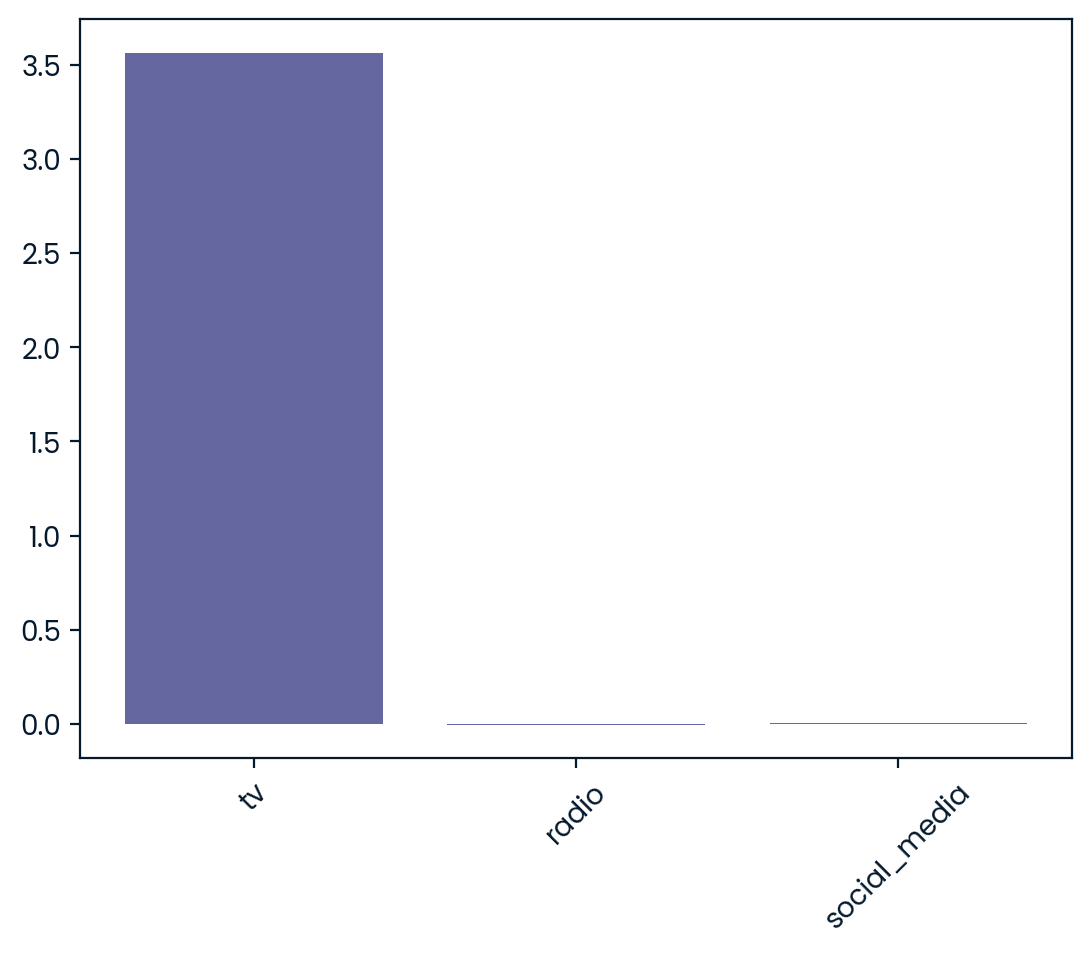

In [102]:
X = advertising.drop(["sales", "influencer"], axis=1).values
y = advertising["sales"].values

sales_columns = advertising.drop(["sales", "influencer"], axis=1).columns

lasso = Lasso(alpha = 0.3)
lasso.fit(X, y)
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

# 3. Fine-Tuning your model

Thinking back to classification problems,recall that we can use accuracy, the fraction of correctly classified labels, to measure model performance. However, accuracy is not always a useful metric.Consider a model for predicting whether a bank transaction is fraudulent, where only 1% of transactions are actually fraudulent. We could build a model that classifies every transaction as legitimate; this model would have an accuracy of 99%! However, it does a terrible job of actually predicting fraud, so it fails at its original purpose. The situation where one class is more frequent is called class **imbalance**. Here, the class of **legitimate transactions** contains way more instances than the class of fraudulent transactions. This is a common situation in practice and requires a different approach to assessing the **model's performance**.

- Confusion matrix for assessing classification performance

|                        | Predicted: Legitimate | Predicted: Fraudulent |
|------------------------|-----------------------|-----------------------|
| **Actual: Legitimate** | True Negative         | False Positive        |
| **Actual: Fraudulent** | False Negative        | True Positive         |


- **True Negative**:-The actual class (the true label) is negative (e.g., legitimate, non-fraudulent, etc.).
The model correctly predicts the class as negative.

**Importent Metrics for model performance**

Usually, the class of interest is called the positive class. As we aim to detect fraud, the positive class is an illegitimate transaction. So why is the confusion matrix important? 

**Accuracy:-**
Firstly, we can retrieve accuracy: it's the sum of true predictions divided by the total sum of the matrix.

Accuracy = (True Positives + True Negatives) / (Total Instances)

**Precision:-**
Secondly, there are other important metrics we can calculate from the confusion matrix. Precision is the number of true positives divided by the sum of all positive predictions. It is also called the positive predictive value. In our case, this is the number of correctly labeled fraudulent transactions divided by the total number of transactions classified as fraudulent. High precision means having a lower false positive rate. For our classifier, this translates to fewer legitimate transactions being classified as fraudulent.

Precision = (True Positives)/ (True Positive + False Positive)

**Recall:-**
Recall is the number of true positives divided by the sum of true positives and false negatives. This is also called sensitivity. High recall reflects a lower false negative rate. For our classifier, it means predicting most fraudulent transactions correctly.

Recall = (True Positive)/(True Positive + False Negative)

**F1 score:-**
The F1-score is the harmonic mean of precision and recall. This metric gives equal weight to precision and recall, therefore it factors in both the number of errors made by the model and the type of errors. The F1 score favors models with similar precision and recall, and is a useful metric if we are seeking a model which performs reasonably well across both metrics.

F1 score = 2 *  (Precision * Recall)/(Precision + Recall)

 you will be provided with three different classification problems, and your task is to select the problem where precision is best suited as the primary metric.
 
 
1. A model predicting the presence of cancer as the positive class.

2. A classifier predicting the positive class of a computer program containing malware.

3. A model predicting if a customer is a high-value lead for a sales team with limited capacity.

**The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years)**. Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

In [103]:
print(diabetes.head())

   pregnancies  glucose  diastolic  triceps  ...   bmi    dpf  age  diabetes
0            6      148         72       35  ...  33.6  0.627   50         1
1            1       85         66       29  ...  26.6  0.351   31         0
2            8      183         64        0  ...  23.3  0.672   32         1
3            1       89         66       23  ...  28.1  0.167   21         0
4            0      137         40       35  ...  43.1  2.288   33         1

[5 rows x 9 columns]


In [104]:
X = diabetes[['bmi', 'age']].values
y = diabetes['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[116  35]
 [ 46  34]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       151
           1       0.49      0.42      0.46        80

    accuracy                           0.65       231
   macro avg       0.60      0.60      0.60       231
weighted avg       0.64      0.65      0.64       231



he model produced 34 true positives and 35 false positives, meaning precision was less than 50%, which is confirmed in the classification report. The output also shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

## Logistic Regression and the ROC curve

Despite its name, logistic regression is used for classification. This model calculates the probability, p, that an observation belongs to a binary class. Using our diabetes dataset as an example, if p is more than or equal to zero-point-five, we label the data as one, representing a prediction that an individual is more likely to have diabetes; if p is less than zero-point-five, we label it zero to represent that they are more likely to not have diabetes.

Note that logistic regression produces a linear decision boundary, as we can see in this image.
![linear decision boundary](linear%20decision%20boundary.PNG)

We can predict probabilities of each instance belonging to a class by calling logistic regression's predict_proba method and passing the test features. This returns a 2-dimensional array with probabilities for both classes, in this case, that the individual did not churn, or did churn, respectively.

In [105]:
X = diabetes[['bmi', 'age']].values
y = diabetes['diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
print(y_pred_prob[0])

0.5070308954968983


The default probability threshold for logistic regression in scikit-learn is zero-point-five. This threshold can also apply to other models such as KNN. **So what happens as we vary this threshold?**

**The ROC curve**

The ROC curve (Receiver Operating Characteristic curve) is used to evaluate the performance of a classification model, especially for binary classification problems. Here's why the ROC curve is important

We can use a receiver operating characteristic, or ROC curve, to visualize how different thresholds affect true positive and false positive rates. Here, the dotted line represents a chance model, which randomly guesses labels.

![p-value-1](p-value-1.PNG)

When the threshold equals zero, the model predicts one for all observations, meaning it will correctly predict all positive values, and incorrectly predict all negative values.

![p-1](p-1.PNG)

If the threshold equals one, the model predicts zero for all data, which means that both true and false positive rates are zeros.

![p-3](p-3.PNG)

if we vary the threshold, we get a series of different false positive and true positive rates.

![p-4](p-4.PNG)

A line plot of the thresholds helps to visualize the trend.

![p-6](p-6.PNG)

## Plotting the ROC curve

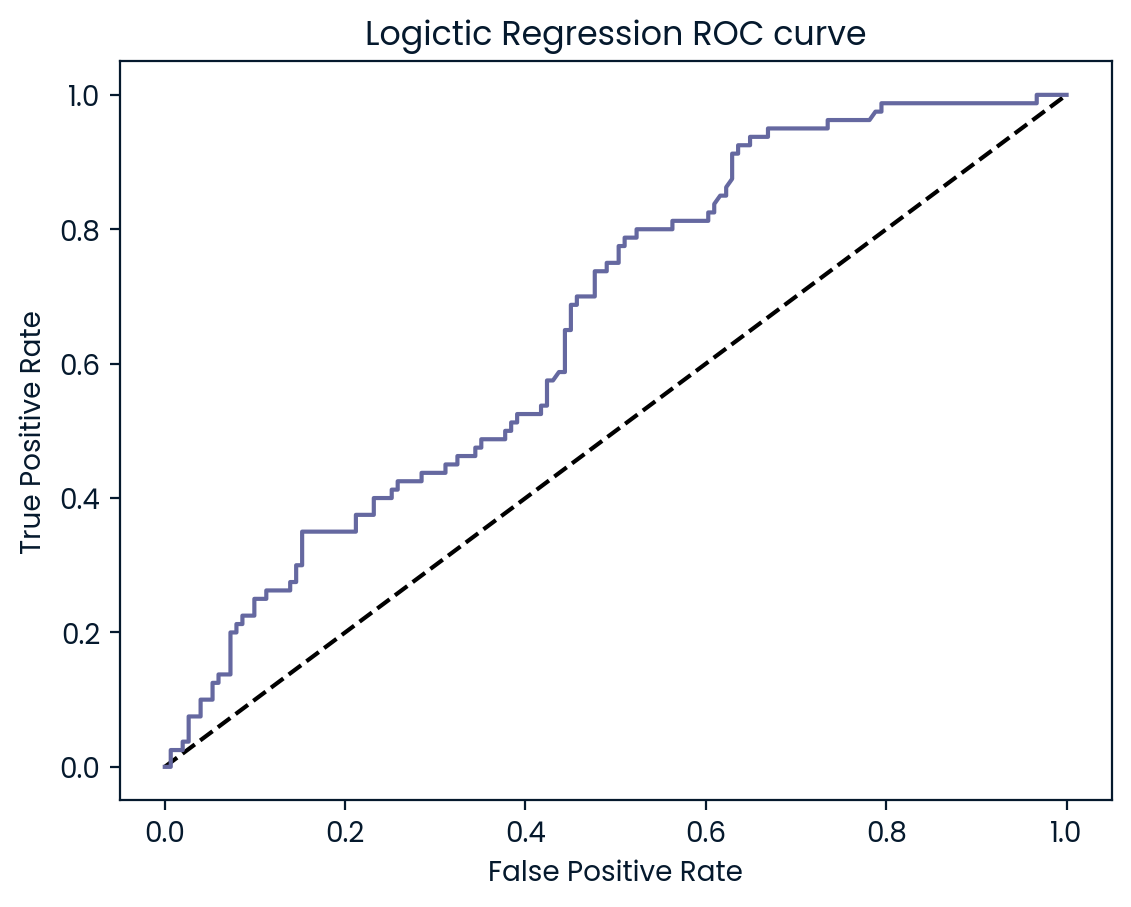

In [106]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
sns.despine(left = True, bottom = True)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logictic Regression ROC curve')
plt.show()

The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

To produce a figure such as this. This looks great, but how do we quantify the model's performance based on this plot?

If we have a model with one for true positive rate and zero for false positive rate, this would be the perfect model. Therefore, we calculate the area under the ROC curve, a metric known as AUC. Scores range from zero to one, with one being ideal.Here, the model scores point-six-seven, which is only 34% better than a model making random guesses.

In [107]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred_prob))

0.6591059602649006


Chance model?

A chance model refers to a baseline model that makes predictions purely by random guessing, without any underlying patterns or information learned from the data. It is essentially a model that has no predictive power and is used as a reference to evaluate the performance of a real model.

## Hyperparameter tuning

Recall that we had to choose a value for alpha in ridge and lasso regression before fitting it. Likewise, before fitting and predicting KNN, we choose n_neighbors. Parameters that we specify before fitting a model, like alpha and n_neighbors, are called hyperparameters. So, a fundamental step for building a successful model is choosing the correct hyperparameters. We can try lots of different values, fit all of them separately, see how well they perform, and choose the best values! This is called hyperparameter tuning. When fitting different hyperparameter values, we use cross-validation to avoid overfitting the hyperparameters to the test set. We can still split the data, but perform cross-validation on the training set. We withhold the test set and use it for evaluating the tuned model.

**Grid Search cross validation**

One approach for hyperparameter tuning is called grid search, where we choose a grid of possible hyperparameter values to try. For example, we can search across two hyperparameters for a KNN model - the type of metric and a different number of neighbors. Here we have n neighbors between two and eleven in increments of three, and two metrics: euclidean and manhattan. Therefore, we can create a grid of values like this.We perform k-fold cross-validation for each combination of hyperparameters. The mean scores for each combination are shown here.We then choose hyperparameters that performed best, as shown here.

![grid search cross validation](grid%20search%20cross%20validation.PNG)

you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

In [108]:
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=5, random_state=42, shuffle=True)
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}
lasso_CV = GridSearchCV(Lasso(), param_grid, cv=kf) #have to use Lasso() not Lasso. but in the course                                                       they use lasso without breacket 
lasso_CV.fit(X_train, y_train)
print("tuned lasso parameters {}".format(lasso_CV.best_params_))
print("tuned lasso score {}".format(lasso_CV.best_score_))

tuned lasso parameters {'alpha': 1e-05}
tuned lasso score 0.17325351425055813


Unfortunately, the best model only has an R-squared score of 0.17, highlighting that using the optimal hyperparameters does not guarantee a high performing model!

**Limitation and Alternative Approach**

Grid search is great. However, the number of fits is equal to the number of hyperparameters multiplied by the number of values multiplied by the number of folds. Therefore, it doesn't scale well! So, performing 3-fold cross-validation for one hyperparameter with 10 values each means 30 fits, while 10-fold cross-validation on 3 hyperparameters with 10 values each equals 900 fits! However, there is another way.

**RendomizedSearchCV**

We can perform a random search, which picks random hyperparameter values rather than exhaustively searching through all options.

In [109]:
from sklearn.model_selection import RandomizedSearchCV, KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0: 0.8, 1: 0.2}]}

logreg = LogisticRegression()

ridge_cv = RandomizedSearchCV(logreg, params, cv=kf)
ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)

{'tol': 0.28578571428571425, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.13673469387755102} 0.7019383869851159


# 4. Preprocessing and Pipeline

Recall that scikit-learn requires numeric data, with no missing values. All the data that we have used so far has been in this format. However, with real-world data, this will rarely be the case, and instead we need to preprocess our data before we can build models.

- **Dealing with categorical features**

   Say we have a dataset containing categorical features, such as color. As these are not numeric, scikit-learn will not accept them and we need to convert them into numeric features. We achieve this by splitting the feature into multiple binary features called dummy variables, one for each category. Zero means the observation was not that category, while one means it was.
   
- **Dummy variable**
    Say we are working with a music dataset that has a genre feature with ten values such as Electronic, Hip-Hop, and Rock.We create binary features for each genre. As each song has one genre, each row will have a 1 in one of the ten columns and zeros in the rest. If a song is not any of the first nine genres, then implicitly, it is a rock song. That means we only need nine features, so we can delete the Rock column. If we do not do this, we are duplicating information, which might be an issue for some models.
    
![Dummy variable](Dummy%20variable.PNG)

- **Dealing with categorical features in python**
    To create dummy variables we can use scikit-learn's OneHotEncoder, or pandas' get_dummies. We will use get_dummies.We will be working with a music dataset in this chapter, for both classification and regression problems. Initially, we will build a regression model using all features in the dataset to predict song popularity. There is one categorical feature, genre, with ten possible values.

- **EDA w/ categorical feature**

    This box plot shows how popularity varies by genre. 

In [110]:
music.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


Since we have a `genre` column with no categorical value so we can not draw `popularity` va `genre` boxplot.Also we will not convert the categorical feature to dummy variable, since they alrealy convert the `genre` catregorical column to numeric.But we add the code, how to convert the categorical feature value to dummy numeric

In [111]:
import pandas as pd

music_dummies = pd.get_dummies(music['genre'], drop_first=True)
print(music_dummies.head())
music_dummies = pd.concat([music, music_dummies], axis= 1)
music_dummies = music_dummies.drop('genre', axis = 1)

   1
0  1
1  1
2  1
3  1
4  1


If the DataFrame only has one categorical feature, we can pass the entire DataFrame, thus skipping the step of combining variables. If we don't specify a column, the new DataFrame's binary columns will have the original feature name prefixed, so they will start with genre-underscore - as shown here. Notice the original genre column is automatically dropped. Once we have dummy variables, we can fit models as before.

In [112]:
music_dummies = pd.get_dummies(music, drop_first=True)
#When using pd.get_dummies() in pandas, the drop_first=True parameter is used to avoid multicollinearity in statistical models like linear regression. Multicollinearity = When one variable is a linear combination of others.
print(music_dummies.columns)

Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre'],
      dtype='object')


## Linear Regression with dummies variable

In [113]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming music_dummies is already defined and loaded
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies['popularity'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the number of samples in the training set
n_samples = X_train.shape[0]

# Ensure the number of splits is not greater than the number of samples  <--------- IMPORTENT CHECK
n_splits = min(5, n_samples)

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
linreg = LinearRegression()
linreg_CV = cross_val_score(linreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
print(np.sqrt(-linreg_CV))

[ 8.54974458 10.30548473 10.485822   10.32767843  9.32783382]


## Handling missing data

- **Missing data**

    When there is no value for a feature in a particular row, we call it missing data. This can happen because there was no observation or the data might be corrupt. Whatever the reason, we need to deal with it.

In [114]:
music.isna().sum().sort_values()

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64

This datafram is the cleaned version of that datacamp update

- **Dropping missing data**

    A common approach is to remove missing observations accounting for less than 5% of all data. To do this, we use pandas' dot-dropna method, passing a list of columns with less than 5% missing values to the subset argument. If there are missing values in our subset column, the entire row is removed. Rechecking the DataFrame, we see fewer missing values.

In [115]:
music = music.dropna(subset=['genre', 'popularity', 'loudness', 'liveness'])
print(music.isna().sum().sort_values())

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


- **Imputing values**

    Another option is to impute missing data. This means making an educated guess as to what the missing values could be. We can impute the mean of all non-missing entries for a given feature. We can also use other values like the median. For categorical values we commonly impute the most frequent value. Note we must split our data before imputing to avoid leaking test set information to our model, a concept known as data leakage.

**Imputation with scikit-learn**

In [125]:
from sklearn.impute import SimpleImputer

X_cat = music['genre'].values.reshape(-1, 1)
X_num = music.drop(['genre', 'popularity'], axis=1).values
y = music['popularity'].values

X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size = 0.3, random_state=420)

X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size= 0.3, random_state = 12)

imp_cat = SimpleImputer(strategy="most_frequent")
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

imp_num = SimpleImputer()
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num= imp_num.transform(X_test_num)

X_train = np.append(X_train_cat, X_train_num, axis = 1)
X_test = np.append(X_test_cat, X_test_num, axis = 1)

we will not use `split data` from the above code because the `music` dataframe is already - impulated, and convert `genre` categorical data to `dummies variable`.

**Imputing with pipeline**

In [128]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

X = music.drop('genre', axis=1).values
y = music['genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

imputer = SimpleImputer()
knn = KNeighborsClassifier(n_neighbors=3)

steps = [("imputer", imputer), 
         ("knn", knn)]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[130  20]
 [  0 150]]


## Centering and scaling

- **Why scale our data?**

   Let's use df-dot-describe to check out the ranges of some of our feature variables in the music dataset. We see that the ranges vary widely: duration_ms ranges from zero to one-point-six-two million, speechiness contains only decimal places, and loudness only has negative values!Many machine learning models use some form of distance to inform them, so if we have features on far larger scales, they can disproportionately influence our model. For example, KNN uses distance explicitly when making predictions. For this reason, we actually want features to be on a similar scale. To achieve this, we can normalize or standardize our data, often referred to as scaling and centering.

In [118]:
print(music[['duration_ms', "loudness", "speechiness"]].describe())

        duration_ms     loudness  speechiness
count  1.000000e+03  1000.000000  1000.000000
mean   2.172204e+05    -8.253305     0.077879
std    1.175582e+05     5.158523     0.089451
min   -1.000000e+00   -38.718000     0.023400
25%    1.806562e+05    -9.775500     0.033100
50%    2.163000e+05    -6.855000     0.043600
75%    2.605025e+05    -4.977750     0.074950
max    1.617333e+06    -0.883000     0.710000


- **How to scale our data**

    There are several ways to scale our data: given any column, we can subtract the mean and divide by the variance so that all features are centered around zero and have a variance of one. This is called **standardization**. We can also subtract the minimum and divide by the range of the data so the normalized dataset has minimum zero and maximum one. Or, we can center our data so that it ranges from -1 to 1 instead. In this video, we will perform standardization, but scikit-learn has functions available for other types of scaling.

In [119]:
from sklearn.preprocessing import StandardScaler

X = music.drop('genre', axis=1).values
y = music['genre'].values

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(np.mean(X), np.std(y))
print(np.mean(X_trained_scaled), np.std(X_test_scaled))

20666.582585618085 0.5
6.683542608243442e-16 1.0227236375036504


**Centering and scaling for regression**

In [132]:
from sklearn.preprocessing import StandardScaler

X = music.drop('genre', axis=1).values
y = music['genre'].values

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=12)

steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha= 0.5))]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))

-0.000625250100040109


**Centering and scaling for classification**

In [121]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.9275 
 {'logreg__C': 0.5793684210526315}


my result and is not same because - there target variable here is "genre", which contains binary values for rock as 1 and any other genre as 0.

In [122]:
print(music['genre'].value_counts())

1    500
0    500
Name: genre, dtype: int64


### Evaluating Multiple Models

We've covered all parts of the supervised learning workflow. But how do we decide which model to use in the first place?

### Different Models for Different Problems

This is a complex question, and the answer depends on our situation. However, there are some principles that can guide us when making this decision. The size of our dataset plays a role. Fewer features means a simpler model, and can reduce training time. Also, some models, such as Artificial Neural Networks, require a lot of data to perform well. We may need an interpretable model, so we can explain to stakeholders how predictions were made. An example is linear regression, where we can calculate and interpret the model coefficients. Alternatively, flexibility might be important to get the most accurate predictions. Generally, flexible models make fewer assumptions about the data; for example, a KNN model does not assume a linear relationship between the features and the target.

### It's All in the Metrics

Notice that scikit-learn allows the same methods to be used for most models. This makes it easy to compare them! Regression models can be evaluated using the root mean squared error, or the R-squared value. Likewise, classification models can all be analyzed using accuracy, a confusion matrix and its associated metrics, or the ROC AUC. Therefore, one approach is to select several models and a metric, then evaluate their performance without any form of hyperparameter tuning.

- **A note on scaling:-**
 Recall that the performance of some models, such as KNN, linear regression, and logistic regression, are affected by scaling our data. Therefore, it is generally best to scale our data before evaluating models out of the box.

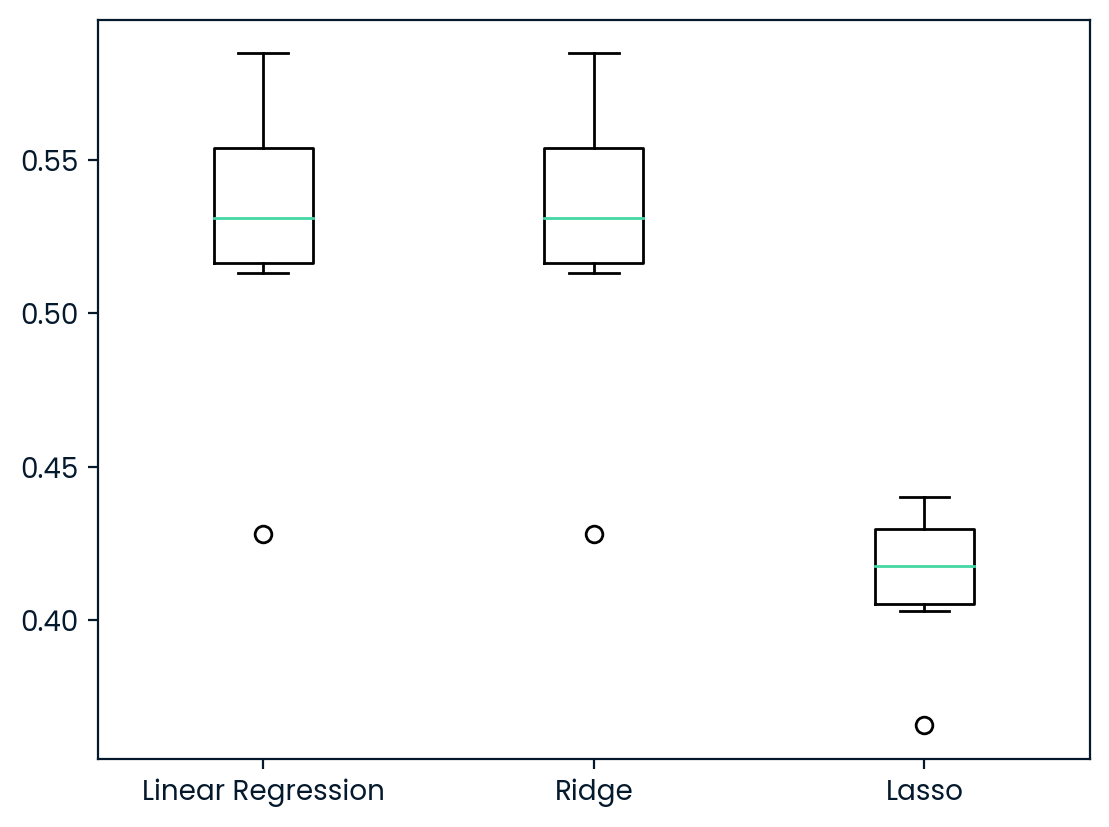

In [6]:
X = music.drop('genre', axis=1).values
y = music['genre'].values

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

Lasso regression is not a good model for this problem, while linear regression and ridge perform fairly equally.

### Predicting on the test set

In [7]:
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  test_rmse = mean_squared_error(y_test, y_pred, squared= False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.32447109575153105
Ridge Test Set RMSE: 0.324471784942397
Lasso Test Set RMSE: 0.37622725057607803


### Visualizing classification model performance

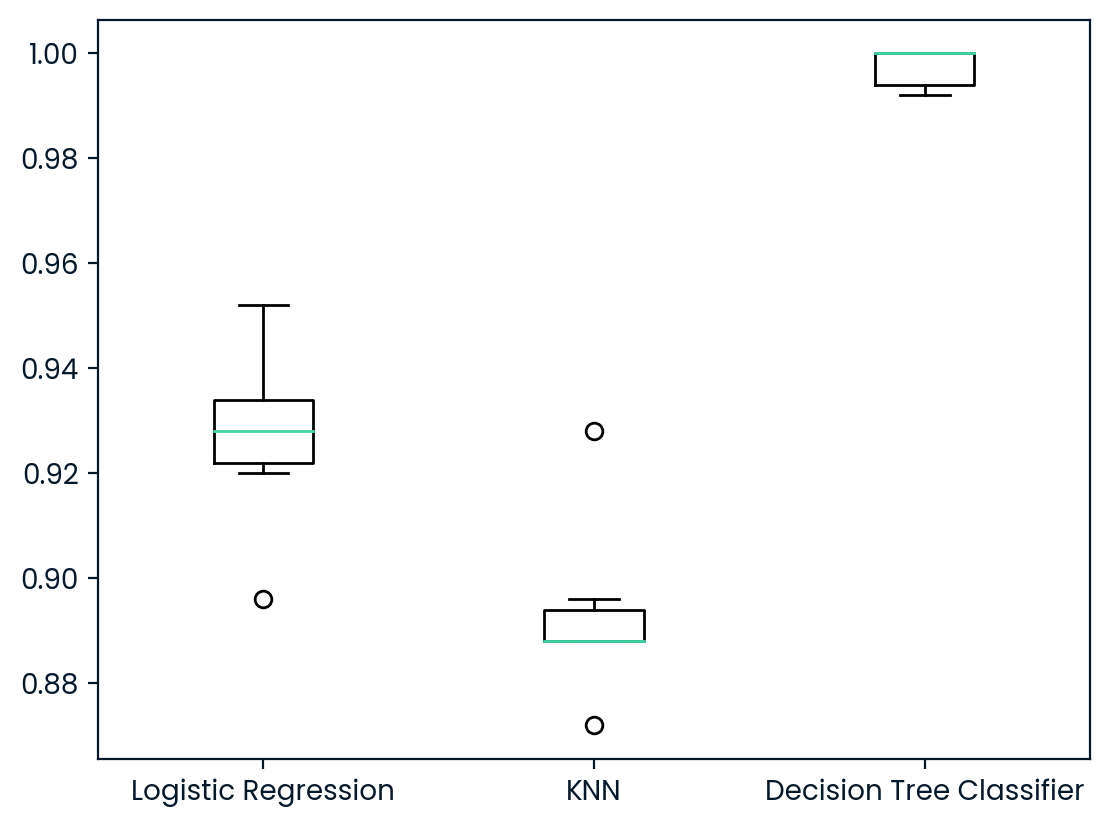

In [10]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits= 6, random_state= 12, shuffle= True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model,X_train_scaled, y_train,cv= kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

Looks like logistic regression is the best candidate based on the cross-validation results!

In [17]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],"logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 1.0, 'logreg__solver': 'newton-cg'}, Accuracy: 0.92


1.logreg__solver: This is the optimization algorithm used to minimize the cost function in Logistic Regression. The three solvers in this parameter are:

- "newton-cg": A second-order optimization method based on the Newton-Raphson method. It is well-suited for models with a large number of features and for datasets where the logistic regression is not too sparse.

- "saga": A variant of the Stochastic Gradient Descent (SGD) method. It is more suitable for large datasets or when dealing with sparse data (data with many zeros).

- "lbfgs": A quasi-Newton method that approximates the inverse Hessian to improve optimization speed. It works well for small to medium-sized datasets and when computational efficiency is a priority.

2.logreg__C: This is the regularization strength parameter for Logistic Regression. It controls the trade-off between fitting the model well and keeping the model weights small to avoid overfitting. The parameter values in np.linspace(0.001, 1.0, 10) generate 10 evenly spaced values between 0.001 and 1.0. A smaller value of C applies stronger regularization (more penalty), while a larger value of C applies weaker regularization (less penalty), allowing the model to fit the training data more closely.